In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Flow
1) subtract each frame from the one before to create a "motion" image
2) collapse to 1d vertically so we can identify y ranges of motion
3) run a text identifier on a single frame for each group of y ranges to see which matches DD MM, HH:MM
4) use this to reduce to a set of unique frames for each time step
5) run a text identifier on 

total frames are  290


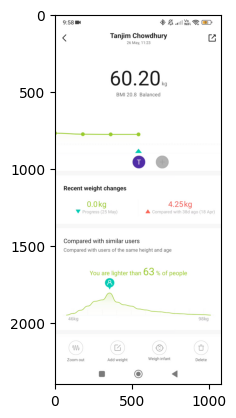

In [11]:
video_path = 'test_data/test.mp4'

cap = cv2.VideoCapture(video_path)

cap.set(cv2.CAP_PROP_POS_FRAMES, 1)

ret, frame = cap.read()

print("total frames are ", int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))

cap.release()

frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.imshow(frame_rgb)
plt.show()


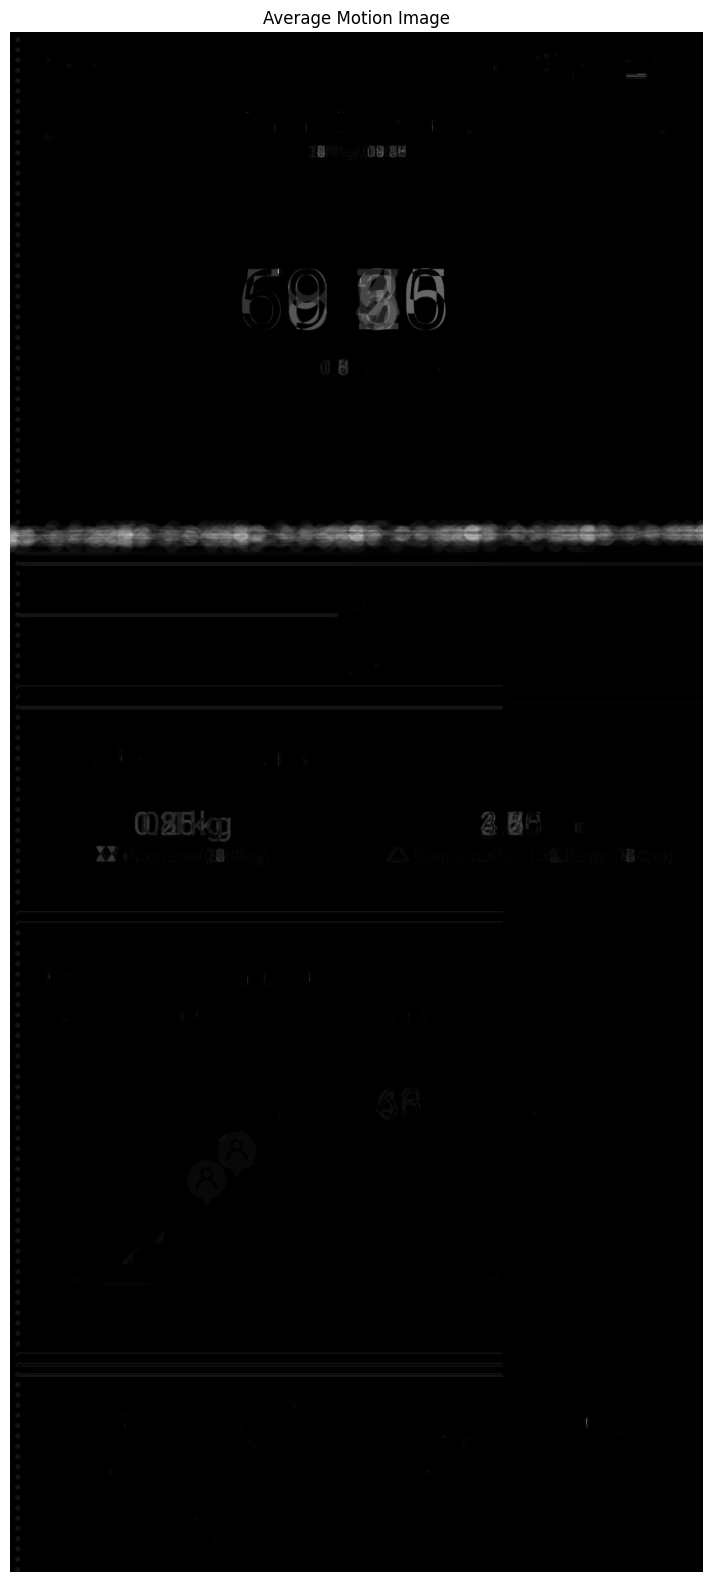

In [14]:
# Path to the video file
video_path = 'test_data/test.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error opening video file")

# Get the total number of frames
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Initialize variables for accumulating differences
accumulated_diff = None
frame_count = 0

# Read the first frame
ret, prev_frame = cap.read()

# Check if the frame is read correctly
if not ret:
    print("Error reading the first frame")

while ret:
    # Read the next frame
    ret, current_frame = cap.read()
    
    if not ret:
        break
    
    # Convert frames to grayscale
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    current_gray = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)
    
    # Compute the absolute difference between the current frame and the previous frame
    diff_frame = cv2.absdiff(current_gray, prev_gray)
    
    # Accumulate the difference
    if accumulated_diff is None:
        accumulated_diff = np.zeros_like(diff_frame, dtype=np.float32)
    
    accumulated_diff += diff_frame
    frame_count += 1
    
    # Set the current frame as the previous frame for the next iteration
    prev_frame = current_frame

# Release the video capture object
cap.release()

# Average the accumulated differences
average_diff = accumulated_diff 

# Convert the average difference to uint8
average_diff_uint8 = cv2.normalize(average_diff, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Display the resulting motion image
plt.figure(figsize=(10, 20))
plt.imshow(average_diff_uint8, cmap='gray')
plt.title('Average Motion Image')
plt.axis('off')
plt.show()